In [2]:
import numpy as np
from math import factorial
from numpy.linalg import norm, matrix_power
from scipy.linalg import expm
import time
from scipy.interpolate import pade
import matplotlib.pyplot as plt
%matplotlib inline
from math import pow as power
from ipywidgets import interactive

#### Code

1. Fix $s = 2$, $m = 8$, $n=140$, $a = -100$, $b = 100$
2. $f^{m} = [1,1,\frac{1}{2!},\dots, \frac{1}{m!}]$ where $f^{m}\in\mathbb{R}^{m+1}$
3. Define $xgrid = \{x_k = a + \frac{b-a}{n}k:\ k = 0,\dots,n\}\in \mathbb{R}^{n+1}$
4. $z_{jk} = x_j + ix_k\quad j,k = 0,\dots, n$ and define: 
$$
Z = \left[\begin{array}{cccc|c}
z_{00} & z_{01} & \dots & z_{0n}  \\
z_{10} & z_{11} & \dots & z_{1n}  \\
\vdots & \vdots & \ddots & \\
z_{n0} & z_{n1} & \dots & z_{nn} 
\end{array}\right] \in\mathbb{C}^{(n+1)\times (n+1)}
$$
5. Define the *Truncated Taylor Series* $T_m$ by: 
$$ T_m\left(\frac{z_{jk}}{2^s}\right) = \sum_{t=0}^{m}\left(\frac{z_{jk}}{2^s}\right)^t\frac{1}{t!} = \sum_{t=0}^{m}\left(\frac{z_{jk}}{2^s}\right)^t f^m_t$$ To reduce the notation, if we define $Z^m_{jk} = \left(1, \frac{z_{jk}}{2^s}, (\frac{z_{jk}}{2^s})^2, \dots, (\frac{z_{jk}}{2^s})^m\right)^T\in\mathbb{C}^{m+1}$ We have $T_m\left(\frac{z_{jk}}{2^s}\right) = (Z^m_{jk})^T f^m$ for each $j,k = 0,\dots, n$
Let me define: 
$$\left(T_m\left(\frac{Z}{2^s}\right)\right)_{jk} =  T_m\left(\frac{z_{jk}}{2^s}\right) \quad j,k = 0,\dots, n$$
6. Calculate the exact exponential function using `exp` command on python/matlab: $$Exact = \left[\begin{array}&
e^{z_{00}} & e^{z_{01}} & \dots & e^{z_{0n}}  \\
e^{z_{10}} & e^{z_{11}} & \dots & e^{z_{1n}}  \\
\vdots & \vdots & \ddots & \\
e^{z_{n0}} & e^{z_{n1}} & \dots & e^{z_{nn}} 
\end{array}\right] \in\mathbb{C}^{(n+1)\times (n+1)}
$$
7. Calculate the error using $L^1$ norm (also absolute norm):
$$ E^{abs}_{jk} = \left| exp(z_{jk}) - T_m\left(\frac{z_{jk}}{2^s}\right)^{2^s}\right|$$ So you can again make a matrix $E^{abs}\in\mathbb{R}^{(n+1)\times(n+1)}$. Since each term $E^{abs}_{jk}>0$, but due to floating point arithemic, $E^{abs}_{jk}> \epsilon_{mach} \approx 2\times 10^{-16}$. Then taking the $log_{10}$, we get $log_{10}(E^{abs}_{jk})> -16$. We only concerned with values $z_{jk}$ where $E^{abs}_{jk} \approx 0$, so in our diagram, we will only consider $log_{10}(E_{jk})\in(-16,0)$.
8. Plot the contour diagram. 

You can repeat steps $7.$ by using a **relative error** instead of absolute i.e. $$ E^{rel}_{jk} = \left|\frac{ exp(z_{jk}) - T_m\left(\frac{z_{jk}}{2^s}\right)^{2^s}}{exp(z_{jk})}\right|$$

When looking at *Relative Error* i.e.
$$ E^{rel}_{jk} = \left|\frac{ exp(z_{jk}) - T_m\left(\frac{z_{jk}}{2^s}\right)^{2^s}}{exp(z_{jk})}\right|$$
we desire for $E^{rel}_{jk} \approx 0$, however in reality, the error can go in the order of $O(10^{74})$ in my numerical simulations (when $s=2$, $m=8$). One of the reason for this is that our *truncated taylor series* is expanded around $z = 0$. Therefore, as we move away from zero, our relative error generally gets worse. But since *Absolute Error* is $ E^{abs}_{jk} = \left| exp(z_{jk}) - T_m\left(\frac{z_{jk}}{2^s}\right)^{2^s}\right|$, the same holds when $Re(z_{jk}) > 0$, but, when $Re(z_{jk}) < 0$, we still see a fairly good approximation (i.e $E^{abs}_{jk}$ is in the order $O(10^{-16}$) when $s=4$, $m=8$) even when $Re(z_{jk})$ is away from $0$. Around $Re(z_{jk}) = -50$, we see an excellent (low) absolute error, but relative error is really bad. 

48.137798461277754


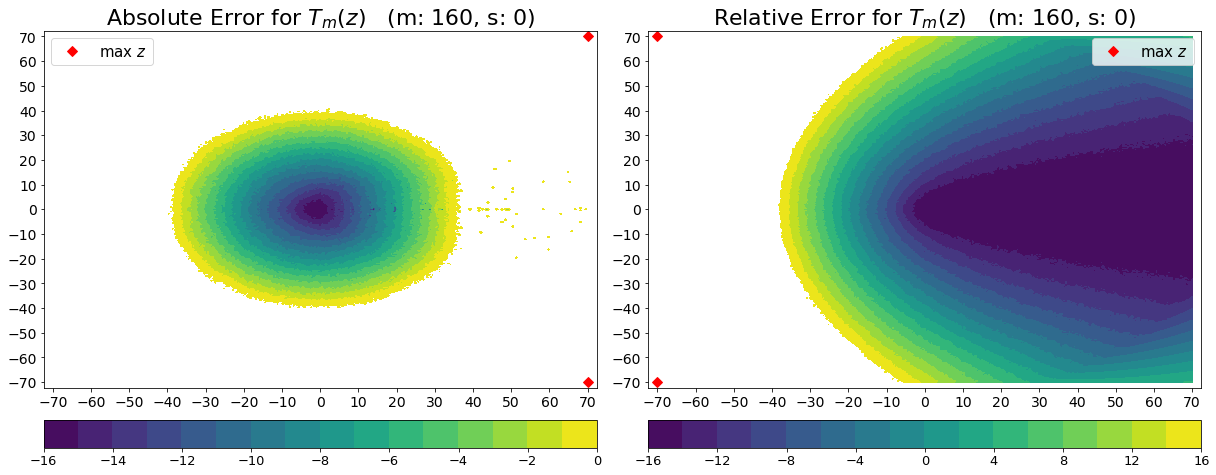

Relative Error Analysis
Largest error z_jk:[(-70-70j), (-70+70j)]
Maximum Error Order: 64.63889113167286

Smallest error z_jk: (51.33333333333333-19.6j)
Minimum Error Order: -15.954589770191003

Absolute Error Analysis
Largest error z_jk:[(70-70j), (70+70j)]
Maximum Error Order: 34.561847451974536

Smallest error z_jk: (51.33333333333333-19.6j)
Minimum Error Order: -15.954589770191003



In [3]:
def experiment_taylor(s=3, m=18 , n = 400, a = -60, b = 60):
    
    def approx_taylor_exp(x,m):
        f_m = list(map(lambda k: 1/factorial(k),range(0,m+1)))
        f_m.reverse()
        p = np.poly1d(f_m)
        return p(x)
    
    def segment(m,s):
        r = (10**(-2**(4-s))*(2**(s*(m+1))*factorial(m+1)))**(1/(m+1))
        print(r)
        re_z_high = np.log(10**(-16))
        return r, re_z_high

    xgrid = np.linspace(a,b,n+1)
    X,Y = np.meshgrid(xgrid,xgrid)
    Z = X+1j*Y
    #print(Z[50,:][8])
    r,re_z_high = segment(m,s)
    Z_circle = Z[np.sqrt(X**2+Y**2) < r]
    Z_circle = Z_circle[np.real(Z_circle) < re_z_high]
    #print(Z_circle)
    

    T_m = np.power(approx_taylor_exp(Z/(2**s),m),(2**s))
    exact_M = np.exp(Z)  
    eps = 0.5*np.spacing(1)  #machine precision
    
    rel_Error = np.log10((abs((exact_M - T_m)/exact_M)) + eps)
    abs_Error = np.log10(abs(exact_M - T_m) + eps)
    
    #print(10**(rel_Error[50,:][8]))
    #print(10**(abs_Error[50,:][8]))
    
    max_rel_error_ind = np.where(rel_Error == rel_Error.max())
    min_rel_error_ind = np.argmin(rel_Error)  #flattens the matrix and then gives an index
    rel_i,rel_j = min_rel_error_ind//(n+1), min_rel_error_ind%(n+1)
    
    max_abs_error_ind = np.where(abs_Error == abs_Error.max())
    min_abs_error_ind = np.argmin(abs_Error)  #flattens the matrix and then gives an index
    abs_i,abs_j = min_abs_error_ind//(n+1), min_abs_error_ind%(n+1)
        
    ax = plt.figure(figsize = (17,7))
    
    ax = plt.subplot(1, 2, 2)
    plt.contour(X,Y,rel_Error, levels = np.arange(-16,18,2),colors='black', linewidths=0);
    CS = plt.contourf(X,Y,rel_Error, levels = np.arange(-16,18,2));
    #plt.contour(X,Y,rel_Error,colors='black', linewidths=0.5,levels = 8);
    #CS = plt.contourf(X,Y,rel_Error, levels = 8);
    rel_real, rel_imag = Z[rel_i,rel_j].real, Z[rel_i,rel_j].imag 
    rel_real_max, rel_imag_max = Z[max_rel_error_ind].real, Z[max_rel_error_ind].imag 
    
    '''plt.plot(rel_real,rel_imag,'rx',markersize = 10,label=f'min $z$');'''
    
    plt.plot(rel_real_max,rel_imag_max,'rD',markersize = 7,label='max $z$'); plt.legend();
    plt.colorbar(CS,orientation = 'horizontal',pad = 0.07).ax.tick_params(labelsize=13);
#     plt.title(fr'Relative Error for $[T_m(z/2^s)]^{{2^s}}$   (m: {m}, s: {s})',fontsize = 22)
    plt.title(fr'Relative Error for $T_m(z)$   (m: {m}, s: {s})',fontsize = 22)
    
    padding = 2.4
    plt.tick_params(labelsize=14);
    plt.xticks(np.arange(a, b+1, 10))
    plt.yticks(np.arange(a, b+1, 10))
    plt.xlim(a-padding,b+padding)
    plt.ylim(a-padding,b+padding)
    plt.legend(prop={'size': 15})
    plt.tight_layout()
#     plt.savefig(f'SSM_code/plots/contourplots/rel_m_{m}_s_{s}.eps', format='eps', dpi=1200)
#     plt.show()
    
#     ax = plt.figure(figsize = (8.5,7))
#     ax = plt.subplot(1, 2, 2,facecolor = (230/255, 237/255, 12/255))
    ax = plt.subplot(1, 2, 1)
    plt.contour(X,Y,abs_Error, levels = np.arange(-16,1,1),colors='k',linewidths=0);
    CS2 = plt.contourf(X,Y,abs_Error, levels = np.arange(-16,1,1));
    #plt.contour(X,Y,abs_Error,colors='black', linewidths=0.5);
    #CS2 = plt.contourf(X,Y,abs_Error);
    abs_real, abs_imag = Z[abs_i,abs_j].real, Z[abs_i,abs_j].imag 
    abs_real_max, abs_imag_max = Z[max_abs_error_ind].real, Z[max_abs_error_ind].imag
    
    '''plt.plot(abs_real,abs_imag,'rx',markersize = 10,label=f'min $z$');'''
    plt.plot(abs_real_max,abs_imag_max,'rD',markersize = 7,label=f'max $z$'); plt.legend();
    
    plt.colorbar(CS2, orientation = 'horizontal',pad = 0.07).ax.tick_params(labelsize=13);
    Z_circle = np.absolute(Z)
    #plt.axvline(x= - r ,ls='--',color = 'r',lw=2)
    #plt.axvline(x= re_z_high,ls='--',color = 'y',lw=2)
    #circ = plt.Circle((0, 0), radius=r, color='m',fill=False,linestyle = '--',linewidth =  3)
    #ax.add_patch(circ)
    
    #seg_x = np.array(list(filter(lambda val: abs(val) < r and np.real(val) < re_z_high, Z.reshape(-1))))
    #real,imag = seg_x.real, seg_x.imag 
    #plt.fill(real,imag,color = 'r')
    #plt.fill(seg_x,-seg_y)
    
    #plt.fill_between(Z, abs_Error, Z_circle.reshape(-1), where=Z_circle.reshape(-1)<=112, facecolor='gold')
#     plt.title(f'Absolute Error for $[T_m(z/2^s)]^{{2^s}}$   (m: {m}, s: {s})',fontsize = 22)
    plt.title(f'Absolute Error for $T_m(z)$   (m: {m}, s: {s})',fontsize = 22)
    plt.xlim(a-padding,b+padding)
    plt.ylim(a-padding,b+padding)
    plt.xticks(np.arange(a, b+1, 10))
    plt.yticks(np.arange(a, b+1, 10))
    plt.tick_params(labelsize=14);
    plt.legend(prop={'size': 15})
    plt.tight_layout()
#     plt.savefig(f'SSM_code/plots/contourplots/abs_m_{m}_s_{s}.eps', format='eps', dpi=1200)
    #plt.autoscale(axis='x')
    plt.show()
    
    print('Relative Error Analysis\n=======================')
    print(f"Largest error z_jk:{[z for z in Z[max_rel_error_ind]]}")
    print(f'Maximum Error Order: {np.max(rel_Error)}\n')
    print(f"Smallest error z_jk: {Z[rel_i,rel_j]}")
    print(f'Minimum Error Order: {np.min(rel_Error)}\n')
    
    print('Absolute Error Analysis\n=======================')
    print(f"Largest error z_jk:{[z for z in Z[max_abs_error_ind]]}")
    print(f'Maximum Error Order: {np.max(abs_Error)}\n')
    print(f"Smallest error z_jk: {Z[abs_i,abs_j]}")
    print(f'Minimum Error Order: {np.min(abs_Error)}\n')
    print('=====================================================================================================================')
    #print(f'Complex Lattice:\n{Z}\n')
    #print(f'Relative Error at each z_jk:\n{(abs(exact_M - T_m)/abs(exact_M))}\n')
    #print(f'log_10(rel error):\n{rel_Error}\n')

experiment_taylor(s = 0, m= 160, a = -70, b = 70, n = 300)
# interactive_plot = interactive(experiment_taylor, s=(0, 10),m=(0, 150), n=(0,1000,10),a = (-300,0,10), b = (0, 300,10))
# interactive_plot


### Theoretical Region Finder 

It is the region which I found in section __Best Approximation Region__ which is draw here

262.96660317120796


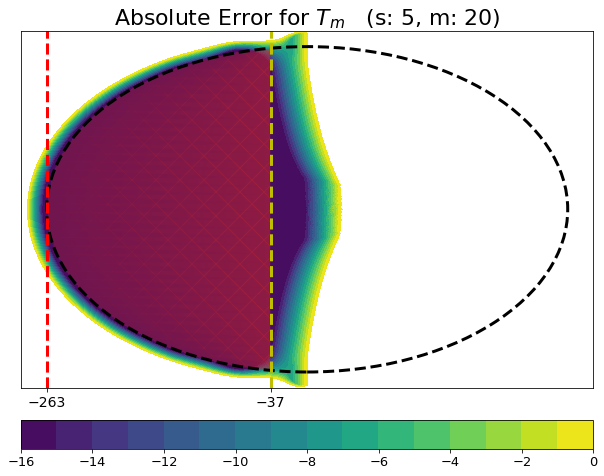

In [5]:
def experiment_taylor(s=3, m=18 , n = 400):
    
    def approx_taylor_exp(x,m):
        f_m = list(map(lambda x: 1/factorial(x),range(0,m+1)))
        f_m.reverse()
        p = np.poly1d(f_m)
        return p(x)
    
    def segment(m,s):
        eps = 0.5*np.spacing(1)
        r = ((eps**(2**(-s)))*(2**(s*(m+1))*factorial(m+1)))**(1/(m+1))
        print(r)
        re_z_high = np.log(10**(-16))
        return r, re_z_high

    r,re_z_high = segment(m,s)
    r,re_z_high = int(round(r)), int(round(re_z_high))
    
    gap = r*0.1
    a = int(-r-gap)
    b = int(r+gap)
    
    xgrid = np.linspace(a,b,n+1)
    X,Y = np.meshgrid(xgrid,xgrid)
    Z = X+1j*Y
    
    
    T_m = approx_taylor_exp(Z/2**s,m)**(2**s)
    exact_M = np.exp(Z)  
    eps = np.spacing(1)  #machine precision
    
    rel_Error = np.log10((abs(exact_M - T_m)/abs(exact_M)) + eps)
    abs_Error = np.log10(abs(exact_M - T_m) + eps)

    plt.figure(figsize = (8.5,7))

    ax = plt.subplot(1, 1, 1)
    plt.contour(X,Y,abs_Error, levels = np.arange(-16,1,1),colors='black', linewidths=0);
    CS2 = plt.contourf(X,Y,abs_Error, levels = np.arange(-16,1,1));
    plt.colorbar(CS2, orientation = 'horizontal',pad = 0.07).ax.tick_params(labelsize=13);
    
    plt.axvline(x= -r ,ls='--',color = 'r',lw=3)
    plt.axvline(x= re_z_high,ls='--',color = 'y',lw=3)
    
    # creating the segment
    seg_x = np.array(list(filter(lambda val: abs(val) < r and np.real(val) < re_z_high, Z.reshape(-1))))
    real,imag = seg_x.real, seg_x.imag 
    
    plt.fill(real,imag,color = '#D22929', alpha = 0.3,hatch='x')
    
    circ = plt.Circle((0, 0), radius=r, color='k',fill=False,linestyle = '--',linewidth =  3)
    ax.add_patch(circ)
    
    plt.title(f'Absolute Error for $T_m$   (s: {s}, m: {m})',fontsize = 22)
    
    plt.xlim(a,b)
    plt.ylim(a,b)
    plt.xticks(np.arange(a, b+1, 10))
    plt.yticks(np.arange(a, b+1, 10))
    #plt.tick_params(labelsize=14,);
    plt.tick_params(labelsize=14)
    ax.tick_params(axis='x', colors='k')
    ax.set_yticks([])
    ax.set_xticks([-r,re_z_high])
    #plt.axis('off')
    plt.tight_layout()
#     ax.set_rasterized(True)
#     plt.savefig(f'Candidate_no_1040706/plots/segmentplots/m_{m}_s_{s}.eps', format='eps', dpi=1200)
    #plt.autoscale(axis='x')
    plt.show()
    
    

# experiment_taylor(s=3 ,m=20 , n = 400)
experiment_taylor(s=5 ,m=20 , n = 400)
# experiment_taylor(s=3 ,m=30 , n = 400)
# experiment_taylor(s=4 ,m=30 , n = 400)

# interactive_plot = interactive(experiment_taylor, s=(0, 10),m=(0, 100), n=(0,1000,10))
# interactive_plot


#### PADE APPROXIMATION

I carried out some analysis of approximating exponential functions using __Pade Diagonal Approximants__, but I did not have any space to write it in the report. So, I have just plotted it here. 

Fix $m=15$ and vary $s=0,4$ 

C:\Users\Anmol\Anaconda3\lib\site-packages\scipy\interpolate\_pade.py:55: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.345601e-72
  pq = linalg.solve(C, an)


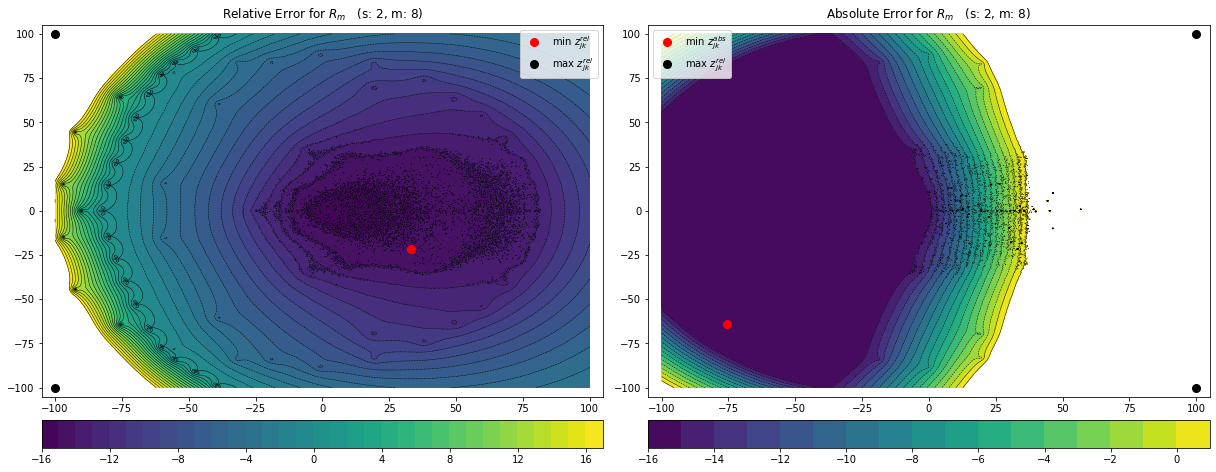


Relative Error Analysis
Largest error z_jk:[(-100-100j), (-100+100j)]
Maximum Error Order: 46.04960862226764

Smallest error z_jk: (33.20000000000002-21.599999999999994j)
Minimum Error Order: -15.653559774527022

Absolute Error Analysis
Largest error z_jk:[(100-100j), (100+100j)]
Maximum Error Order: 40.38796106047776

Smallest error z_jk: (-75.6-64j)
Minimum Error Order: -15.653559774527022



In [10]:
def experiment_pade(s=2 , m=8 , n = 140, a = -100, b = 100):
    
    eps = np.spacing(1)  #machine precision
    
    def approx_pade_exp(x,m):
        f_m = list(map(lambda x: 1/factorial(x),np.arange(0,51)))
        p,q = pade(f_m, m)
        return p(x)/(q(x))

    xgrid = np.linspace(a,b,n+1)
    X,Y = np.meshgrid(xgrid,xgrid)
    Z = X+1j*Y

    R_m = approx_pade_exp(Z/2**s,m)**(2**s)
    exact_M = np.exp(Z)  
    
    rel_Error = np.log10((abs(exact_M - R_m)/abs(exact_M)) + eps)
    abs_Error = np.log10(abs(exact_M - R_m) + eps)
    
    max_rel_error_ind = np.where(rel_Error == rel_Error.max())
    min_rel_error_ind = np.argmin(rel_Error)  #flattens the matrix and then gives an index
    rel_i,rel_j = min_rel_error_ind//(n+1), min_rel_error_ind%(n+1)
    
    max_abs_error_ind = np.where(abs_Error == abs_Error.max())
    min_abs_error_ind = np.argmin(abs_Error)  #flattens the matrix and then gives an index
    abs_i,abs_j = min_abs_error_ind//(n+1), min_abs_error_ind%(n+1)
        
    plt.figure(figsize = (17,7))
    
    plt.subplot(1, 2, 1)
    rel_real, rel_imag = Z[rel_i,rel_j].real, Z[rel_i,rel_j].imag 
    rel_real_max, rel_imag_max = Z[max_rel_error_ind].real, Z[max_rel_error_ind].imag 
    plt.plot(rel_real,rel_imag,'ro',markersize = 8,label='min $z^{rel}_{jk}$');
    plt.plot(rel_real_max,rel_imag_max,'ko',markersize = 8,label='max $z^{rel}_{jk}$'); plt.legend();
    plt.contour(X,Y,rel_Error, levels = np.arange(-16,18,1),colors='black', linewidths=0.5);
    CS = plt.contourf(X,Y,rel_Error, levels = np.arange(-16,18,1));
    plt.colorbar(CS,orientation = 'horizontal',pad = 0.05);
    plt.title(f'Relative Error for $R_m$   (s: {s}, m: {m})')
    padding = 5
    plt.xlim(a-padding,b+padding)
    plt.ylim(a-padding,b+padding)
    
    plt.subplot(1, 2, 2)
    abs_real, abs_imag = Z[abs_i,abs_j].real, Z[abs_i,abs_j].imag 
    abs_real_max, abs_imag_max = Z[max_abs_error_ind].real, Z[max_abs_error_ind].imag 
    plt.plot(abs_real,abs_imag,'ro',markersize = 8,label='min $z^{abs}_{jk}$');
    plt.plot(abs_real_max,abs_imag_max,'ko',markersize = 8,label='max $z^{rel}_{jk}$'); plt.legend();
    plt.contour(X,Y,abs_Error, levels = np.arange(-16,2,1),colors='black', linewidths=0.5);
    CS2 = plt.contourf(X,Y,abs_Error, levels = np.arange(-16,2,1));
    plt.colorbar(CS2, orientation = 'horizontal',pad = 0.05);
    plt.title(f'Absolute Error for $R_m$   (s: {s}, m: {m})')
    padding = 5
    plt.xlim(a-padding,b+padding)
    plt.ylim(a-padding,b+padding)
    
    plt.tight_layout()
    plt.show()
    
    print('\nRelative Error Analysis\n=======================')
    print(f"Largest error z_jk:{[z for z in Z[max_rel_error_ind]]}")
    print(f'Maximum Error Order: {np.max(rel_Error)}\n')
    print(f"Smallest error z_jk: {Z[rel_i,rel_j]}")
    print(f'Minimum Error Order: {np.min(rel_Error)}\n')
    
    print('Absolute Error Analysis\n=======================')
    print(f"Largest error z_jk:{[z for z in Z[max_abs_error_ind]]}")
    print(f'Maximum Error Order: {np.max(abs_Error)}\n')
    print(f"Smallest error z_jk: {Z[abs_i,abs_j]}")
    print(f'Minimum Error Order: {np.min(abs_Error)}\n')
    print('=====================================================================================================================')
    #print(f'Complex Lattice:\n{Z}\n')
    #print(f'Relative Error at each z_jk:\n{(abs(exact_M - T_m)/abs(exact_M))}\n')
    #print(f'log_10(rel error):\n{rel_Error}\n')

experiment_pade(s = 2, m= 8, n = 500,a = -100, b = 100)
# interactive_plot = interactive(experiment_pade, s=(0, 10),m=(0, 15), n=(0,1000,10),a = (-1000,0), b = (0, 100))
# interactive_plot

C:\Users\Anmol\Anaconda3\lib\site-packages\scipy\interpolate\_pade.py:55: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.345601e-72
  pq = linalg.solve(C, an)


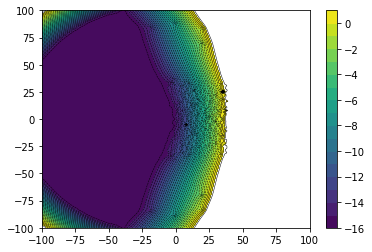

In [42]:
s = 2; m=8;

xgrid = np.linspace(-100,100,140)
x,y = np.meshgrid(xgrid,xgrid)
z = x+1j*y
e_exp = list(map(lambda x: 1/factorial(x),np.arange(0,51)))
p,q = pade(e_exp, m)
#print(p([2,3,4])/q([2,3,4]))
r = lambda x: p(x)/q(x)
M = r(z/2**s)**(2**s)

exact_M = np.exp(z)

eps = np.spacing(1)  #machine precison
#error = np.log10(abs(exact_M - M )+eps)
error = np.log10((np.absolute(exact_M - M)+eps))
#print(np.subtract(exact_M, M ))
plt.contour(x, y, error, levels = np.arange(-16,2,0.5),colors='black', linewidths=0.5)
plt.contourf(x,y,error, levels = np.arange(-16,2,1))
plt.colorbar()
#plt.axis('equal')


plt.show()